# Python 速習

## リスト

6つの数字からなるデータを入力



In [1]:
x =  [11, 18, 14, 16, 15, 19]
x

[11, 18, 14, 16, 15, 19]

In [2]:
x[1]

18

## スライスの利用

In [3]:
x[:2]

[11, 18]

In [4]:
x[1:3]

[18, 14]

In [5]:
x[::-1]

[19, 15, 16, 14, 18, 11]

## 出力の調整

In [6]:
print(x[1])
print(x[:2])
print(x[1:3])
x[::-1]


18
[11, 18]
[18, 14]


[19, 15, 16, 14, 18, 11]

In [7]:
# % 演算子
pi = 3.14
print('pi = %.3f' % pi)
# format
print('{0} = {1}'.format('pi', pi))
# f 文字列の利用
age = 22
# ｆ文字列に変数をブラケットで囲んで指定
print(f'私は{age}歳です。')

num = 1234567890

# 3桁ごとにカンマを挿入
print(f'{num:,}')

# 小数点以下の桁数表示
pi = 3.141

# 小数点2位まで
print(f'pi = ): {pi:.2f}')

# 指定された桁数だけゼロを追加
print(f'pi =  : {pi:.5f}')



pi = 3.140
pi = 3.14
私は22歳です。
1,234,567,890
pi = ): 3.14
pi =  : 3.14100


## 辞書


In [8]:
{'A':0, 'B':1, 'C':2}

{'A': 0, 'B': 1, 'C': 2}

In [9]:
dic = {'A組':['太郎','花子'], 'B組':['次郎','菊子'],'C組':['三郎','松子']}
dic

{'A組': ['太郎', '花子'], 'B組': ['次郎', '菊子'], 'C組': ['三郎', '松子']}

In [10]:
dic['A組']

['太郎', '花子']

In [11]:
for key,value in dic.items():
    print(key,value)


A組 ['太郎', '花子']
B組 ['次郎', '菊子']
C組 ['三郎', '松子']


## 関数



In [12]:
len(x)

6

In [13]:
sum(x) / len(x)

15.5

## numpy


In [14]:
import numpy as np
x = np.array([11, 18, 14, 16, 15, 19])
x

array([11, 18, 14, 16, 15, 19])

In [15]:
x.mean()

15.5

## pandas



In [16]:
import pandas as pd
x = pd.Series([11, 18, 14, 16, 15, 19])
x

,0
0,11
1,18
2,14
3,16
4,15
5,19


In [ ]:
x.mean()

15.5

## データフレーム

In [17]:
dat = pd.DataFrame({'X': [11, 18, 14, 16, 15, 19],
                  'Y': ['A', 'A', 'B','B', 'C','C'],
				    'Z': [0.2, 0.8, 0.4, 0.6, 0.5, 0.9]})
dat

,X,Y,Z
0,11,A,0.2
1,18,A,0.8
2,14,B,0.4
3,16,B,0.6
4,15,C,0.5
5,19,C,0.9


In [18]:
dat = pd.DataFrame({'X': [11, 18, 14, 16, 15, 19],
                  'Y': ['A', 'A', 'B','B', 'C','C'],
				    'Z': [0.2, 0.8, 0.4, 0.6, 0.5, 0.9]},
                   index = ['あ','い','う','え','お','か'])
dat

,X,Y,Z
あ,11,A,0.2
い,18,A,0.8
う,14,B,0.4
え,16,B,0.6
お,15,C,0.5
か,19,C,0.9


In [19]:
# 最初の3行と左から2列を抽出（ゼロ起算）
dat.iloc[:3,:2]

,X,Y
あ,11,A
い,18,A
う,14,B


In [20]:
# 行と列のindexで指定（指定された行、列まで抽出）
dat.loc[:'う',:'Y']

,X,Y
あ,11,A
い,18,A
う,14,B


In [22]:
# locの場合、インデックスが文字列のとき数値を添え字にできない
dat.loc[1:2,:'Y'] # エラーとなる



TypeError: cannot do slice indexing on Index with these indexers [1] of type int

In [23]:
# Pandasバージョン2.2.2ではエラーになる
dat.mean()

TypeError: Could not convert ['AABBCC'] to numeric

In [24]:
dat.select_dtypes(include='number').mean()


,0
X,15.500000
Z,0.566667


In [25]:
dat.groupby('Y').mean()

,X,Z
Y,,
A,14.5,0.5
B,15.0,0.5
C,17.0,0.7


## データ操作とグラフィックス

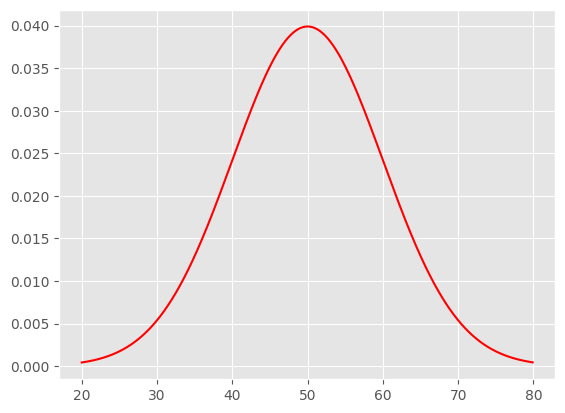

In [26]:
import matplotlib.pyplot as plt
# Rのggplot2風に描画する
plt.style.use('ggplot')
import numpy as np
# 確率関数を利用するためにscipyをロード
from scipy.stats import norm
X = np.arange(20, 80, 0.1)
Y = norm.pdf(X, 50, 10)
# ここで以下のようにしても描画されるが
# plt.plot(X, Y)
# 以下のような手順を踏んで描画するのが望ましい
# 描画領域を準備
fig = plt.figure()
# 描画領域にプロット領域を確保
ax = fig.subplots()
# 描画する
ax.plot(X, Y, color='r')
# Jupyter以外の環境では以下が必要
# plt.show()

### タイタニック号データの描画

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
titanic = sns.load_dataset('titanic')
# plt.show()

In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [28]:
titanic.shape

(891, 15)

In [29]:
titanic['survived'].value_counts()

,count
survived,
0,549
1,342


<Axes: >

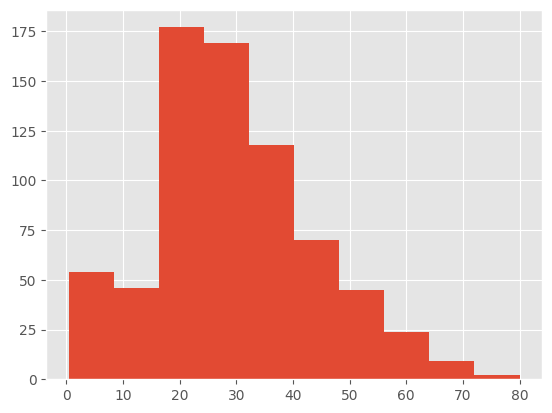

In [30]:
titanic['age'].hist()

<Axes: xlabel='sex', ylabel='count'>

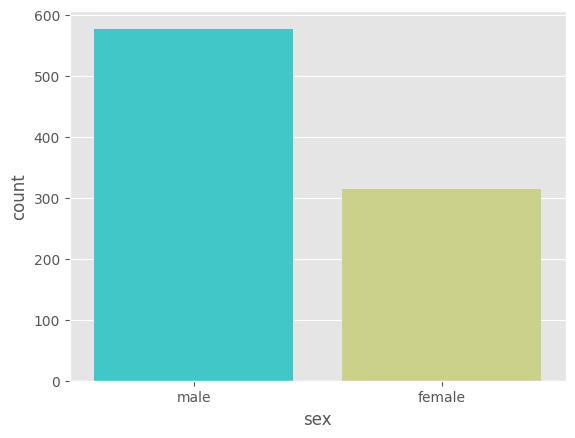

In [34]:
sns.countplot(x='sex', hue='sex',  data=titanic, palette='rainbow')

<Axes: xlabel='pclass', ylabel='count'>

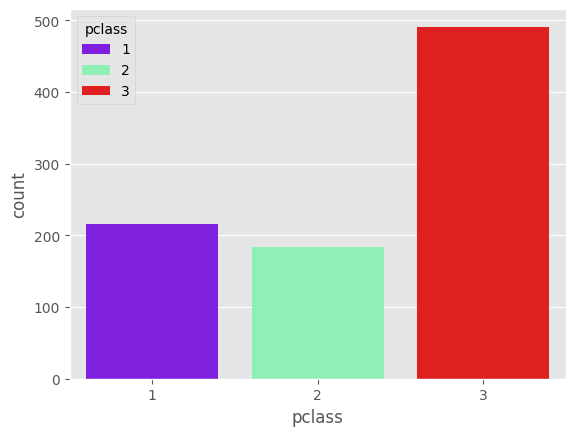

In [36]:
sns.countplot(x='pclass', hue='pclass', data=titanic, palette='rainbow')

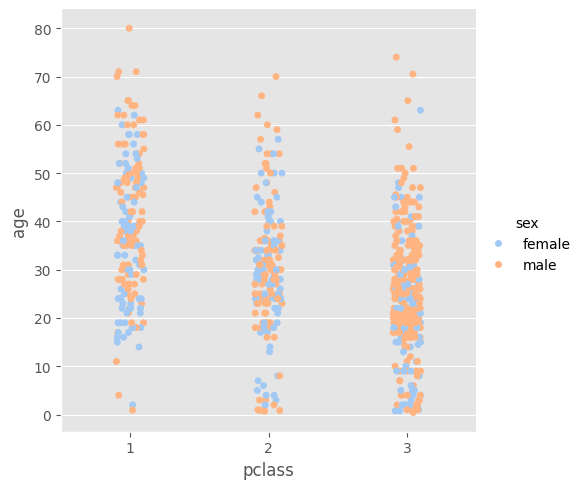

In [37]:
sns.catplot(x='pclass', y='age', hue='sex',data=titanic, palette='pastel')

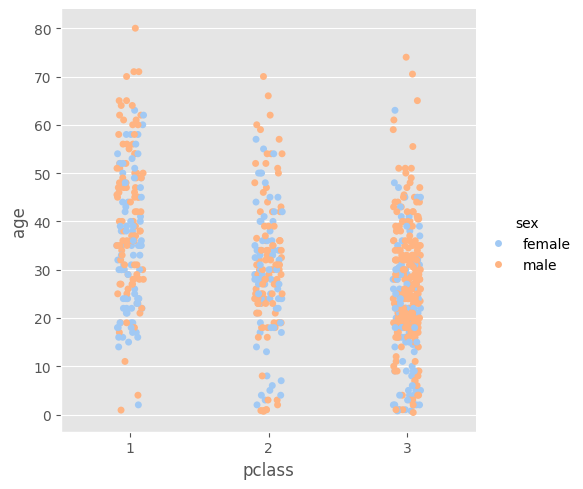

In [38]:
# ちなみに画像を保存するには以下のようにします
fig = sns.catplot(x='pclass',y='age', hue='sex',data=titanic, palette='pastel')# ,height=16, aspect=1)
# fig.axes.set_title("Title",fontsize=50)
# fig.set_xlabel("X Label",fontsize=30)
# fig.set_ylabel("Y Label",fontsize=20)
# sns.set_context("paper", rc={"font.size":24,"axes.titlesize":24,"axes.labelsize":24})
fig.savefig('p252-2.png',dpi=500)

<Axes: xlabel='survived', ylabel='count'>

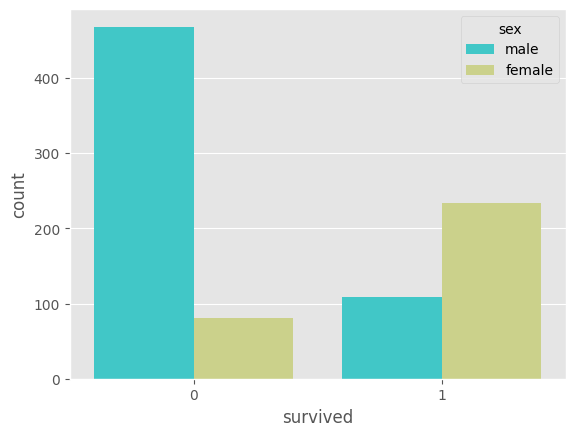

In [39]:
sns.countplot(x='survived', data=titanic, hue='sex', palette='rainbow')

In [40]:
titanic.pivot_table(index="pclass", columns= "sex", values="survived")

sex,female,male
pclass,,
1,0.968085,0.368852
2,0.921053,0.157407
3,0.500000,0.135447


In [41]:
import seaborn as sns
titanic = sns.load_dataset('titanic')


In [42]:
import pandas as pd
dat = pd.DataFrame({'X': [11, 18, 14, 16, 15, 19],
                  'Y': ['A', 'A', 'B','B', 'C','C'],
				    'Z': [0.2, 0.8, 0.4, 0.6, 0.5, 0.9]})
dat

,X,Y,Z
0,11,A,0.2
1,18,A,0.8
2,14,B,0.4
3,16,B,0.6
4,15,C,0.5
5,19,C,0.9


In [43]:
{'A':1, 'B':2, 'C':3}

{'A': 1, 'B': 2, 'C': 3}

In [44]:
dat['Y'].map({'A':1, 'B':2, 'C':3})

,Y
0,1
1,1
2,2
3,2
4,3
5,3


In [45]:
def fun(x):
    return x + 1

In [46]:
dat['X'].map(fun)

,X
0,12
1,19
2,15
3,17
4,16
5,20


In [47]:
dat[['X','Z']].apply(fun)

,X,Z
0,12,1.2
1,19,1.8
2,15,1.4
3,17,1.6
4,16,1.5
5,20,1.9


In [48]:
dat['X'].map(lambda x :x + 1)

,X
0,12
1,19
2,15
3,17
4,16
5,20


In [49]:
dat[['X','Z']].map(fun)

,X,Z
0,12,1.2
1,19,1.8
2,15,1.4
3,17,1.6
4,16,1.5
5,20,1.9


In [53]:
#UKgasデータ
import pandas as pd
df = pd.read_csv("data/UKgas.tsv", sep=r"\s+")
df = df.query('Year >= 1970')
df = pd.melt(df, ['Year'])
df

,Year,variable,value
0,1970,Qtr1,244.9
1,1971,Qtr1,301.0
2,1972,Qtr1,317.0
3,1973,Qtr1,371.4
4,1974,Qtr1,449.9
...,...,...,...
63,1982,Qtr4,683.6
64,1983,Qtr4,694.8
65,1984,Qtr4,730.0
66,1985,Qtr4,787.6


In [54]:
df.sort_values(['Year', 'variable'])

,Year,variable,value
0,1970,Qtr1,244.9
17,1970,Qtr2,216.1
34,1970,Qtr3,188.9
51,1970,Qtr4,142.5
1,1971,Qtr1,301.0
...,...,...,...
66,1985,Qtr4,787.6
16,1986,Qtr1,1163.9
33,1986,Qtr2,613.1
50,1986,Qtr3,347.4


In [56]:
df = pd.read_csv("data/UKgas.tsv", sep=r"\s+", index_col='Year')
df = df.loc[1970:, :]
df = df.stack()
df

Year      
1970  Qtr1     244.9
      Qtr2     216.1
      Qtr3     188.9
      Qtr4     142.5
1971  Qtr1     301.0
               ...  
1985  Qtr4     787.6
1986  Qtr1    1163.9
      Qtr2     613.1
      Qtr3     347.4
      Qtr4     782.8
Length: 68, dtype: float64

In [60]:
df = pd.DataFrame(df, columns = ['values'])
df

values
Year             
1970 Qtr1   244.9
     Qtr2   216.1
     Qtr3   188.9
     Qtr4   142.5
1971 Qtr1   301.0
...           ...
1985 Qtr4   787.6
1986 Qtr1  1163.9
     Qtr2   613.1
     Qtr3   347.4
     Qtr4   782.8

[68 rows x 1 columns]

In [61]:
import os
os.getcwd()


'/content'